### Created By: Nurlan Ismayil


# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import inventorize3 as inv
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
dosya_yolu = r'C:\\Users\\The Capri Hotel\\Downloads\\sales_final_data.csv'
sales = pd.read_csv(dosya_yolu);sales.head()

,order_id,product,product_code,category,address,quantity,price,cost,sales,gross_profit,order_date,gross_margin,period,dow,hour,date,revenue
0,141234,iPhone,5638008983335,smartphones,Germany,1,700.00,231.0000,700.00,469.0000,2023-01-22 21:25:00,0.67,2023-01,Sunday,09 PM,2023-01-22,700.00
1,141235,Lightning Charging Cable,5563319511488,charging cables,İtaly,1,14.95,7.4750,14.95,7.4750,2023-01-28 14:15:00,0.50,2023-01,Saturday,02 PM,2023-01-28,14.95
2,141236,Wired Headphones,2113973395220,headphones,Ispain,2,11.99,5.9950,23.98,11.9900,2023-01-17 13:33:00,0.50,2023-01,Tuesday,01 PM,2023-01-17,23.98
3,141237,27in FHD Monitor,3069156759167,monitors,Irland,1,149.99,97.4935,149.99,52.4965,2023-01-05 20:33:00,0.35,2023-01,Thursday,08 PM,2023-01-05,149.99
4,141238,Wired Headphones,9692680938163,headphones,France,1,11.99,5.9950,11.99,5.9950,2023-01-25 11:59:00,0.50,2023-01,Wednesday,11 AM,2023-01-25,11.99


### 1. 2023 Sales Performanceld

In [5]:
total_sales = sales['sales'].sum()
total_profit = sales['gross_profit'].sum()
num_orders = sales['order_id'].nunique()

print(f'Total sales or GMV for 2023 is: ${total_sales/1000000: .2f} M')
print(f'Total profit for 2023 is: ${total_profit/1000000: .2f} M')
print(f'Gross Margin for 2023:{(total_profit/total_sales) * 100: .2f} %')
print(f'Total number of orders for 2023 is: {num_orders:}')

Total sales or GMV for 2023 is: $ 31.24 M
Total profit for 2023 is: $ 19.42 M
Gross Margin for 2023: 62.15 %
Total number of orders for 2023 is: 161119


### 2. What are the highest- performing products?
    a. Based on profit  
    b. based on sales   
    c. based on quantity sold

In [8]:
# What are the top 5 highest-performing products based on profit?

top5_prod_profit = sales.groupby(['product'])['gross_profit'].sum().sort_values(ascending=False)[:5]
top5_prod_profit

product
Macbook Pro Laptop        4.871503e+06
iPhone                    2.914835e+06
ThinkPad Laptop           2.501755e+06
Google Phone              2.023266e+06
27in 4K Gaming Monitor    1.473433e+06
Name: gross_profit, dtype: float64

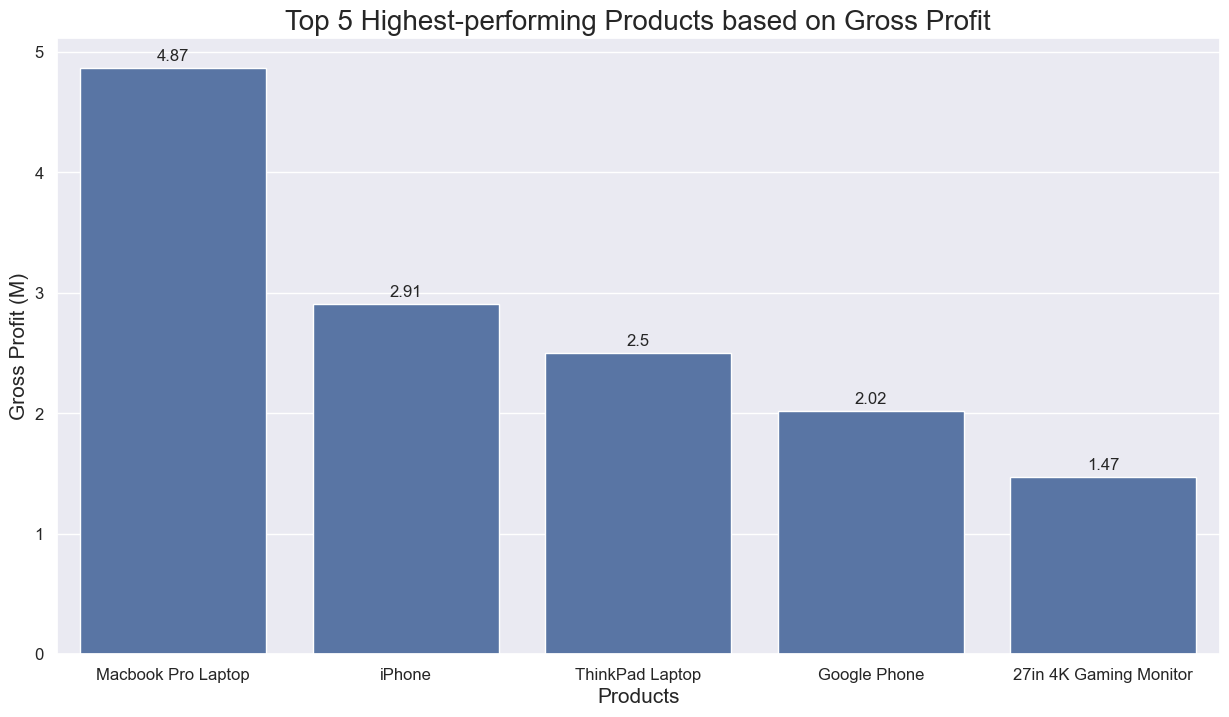

In [9]:
# Visualize the top 5 highest-performing products based on profit

top5_prod_profit = (sales.groupby(['product'])['gross_profit'].sum().sort_values(ascending=False)[:5]/1000000).round(2)

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top5_prod_profit.index, y = top5_prod_profit.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 12)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 5 Highest-performing Products based on Gross Profit', size = 20)
plt.xlabel('Products', size = 15)
plt.ylabel('Gross Profit (M)', size = 15)
plt.show;